<a href="https://colab.research.google.com/github/JesseHenson/malicious_site_ds/blob/main/malicious_site_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: malicious_phish.csv     


In [ ]:
import pandas as pd

df = pd.read_csv("malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df['url_ext_len'] = df.url_ext.apply(lambda x:len(x))
not_top_ten_url_ext = df.url_ext.value_counts()[10:].index


In [ ]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
df['url_ext'] = df.url.apply(lambda x:x.split('.')[-1])
df.head()

,url,type,url_ext
0,br-icloud.com.br,phishing,br
1,mp3raid.com/music/krizz_kaliko.html,benign,html
2,bopsecrets.org/rexroth/cr/1.htm,benign,htm
3,http://www.garage-pirenne.be/index.php?option=...,defacement,php?option=com_content&view=article&id=70&vsig...
4,http://adventure-nicaragua.net/index.php?optio...,defacement,php?option=com_mailto&tmpl=component&link=aHR0...


In [ ]:
df['url_ext_len'] = df.url_ext.apply(lambda x:len(x))
top_ten_url_ext = df.url_ext.value_counts()[0:10].index
df_top_ten_url_ext = df.loc[df.url_ext.isin(top_ten_url_ext)]
df_by_url_type_count = df_top_ten_url_ext.groupby(['url_ext','type']).count()
df_by_url_type_count = df_by_url_type_count.sort_values(by=['url_ext','url'],ascending=[False,False])
df_by_url_type_count

url  url_ext_len  is_safe
url_ext type                                   
shtml   benign       2218         2218     2218
        phishing      559          559      559
php     benign       9948         9948     9948
        phishing     3365         3365     3365
        defacement   1080         1080     1080
        malware       268          268      268
org/    benign       4163         4163     4163
        phishing       15           15       15
m       malware      4100         4100     4100
        benign          1            1        1
html    benign      61109        61109    61109
        defacement  20332        20332    20332
        phishing    14334        14334    14334
        malware       347          347      347
htm     benign      23644        23644    23644
        phishing     6188         6188     6188
        defacement    490          490      490
        malware         6            6        6
exe     malware      5874         5874     5874
        benign          3            3        3
        phishing        3            3        3
com/    benign      33733        33733    33733
        phishing     1129         1129     1129
        malware         4            4        4
com     phishing    11590        11590    11590
        benign        414          414      414
        malware       358          358      358
        defacement      2            2        2
aspx    benign       4992         4992     4992
        phishing      393          393      393
        defacement    195          195      195
        malware         2            2        2

In [ ]:
df_by_type_url_count = df_top_ten_url_ext.groupby(['type','url_ext']).count()
df_by_type_url_count = df_by_type_url_count.sort_values(by=['type','url'],ascending=[False,False])
df_by_type_url_count

url  url_ext_len  is_safe
type       url_ext                             
phishing   html     14334        14334    14334
           com      11590        11590    11590
           htm       6188         6188     6188
           php       3365         3365     3365
           com/      1129         1129     1129
           shtml      559          559      559
           aspx       393          393      393
           org/        15           15       15
           exe          3            3        3
malware    exe       5874         5874     5874
           m         4100         4100     4100
           com        358          358      358
           html       347          347      347
           php        268          268      268
           htm          6            6        6
           com/         4            4        4
           aspx         2            2        2
defacement html     20332        20332    20332
           php       1080         1080     1080
           htm        490          490      490
           aspx       195          195      195
           com          2            2        2
benign     html     61109        61109    61109
           com/     33733        33733    33733
           htm      23644        23644    23644
           php       9948         9948     9948
           aspx      4992         4992     4992
           org/      4163         4163     4163
           shtml     2218         2218     2218
           com        414          414      414
           exe          3            3        3
           m            1            1        1

In [ ]:
df['is_safe'] = df.type.apply(lambda x:1 if x == 'benign' else 0)
df.is_safe.value_counts()

1    428103
0    223088
Name: is_safe, dtype: int64

In [ ]:
df_by_safe_url_count = df_top_ten_url_ext.groupby(['is_safe','url_ext']).count()
df_by_safe_url_count = df_by_safe_url_count.sort_values(by=['is_safe','url'],ascending=[False,False])
df_by_safe_url_count.xs(1)

,url,type,url_ext_len
url_ext,,,
html,61109,61109,61109
com/,33733,33733,33733
htm,23644,23644,23644
php,9948,9948,9948
aspx,4992,4992,4992
org/,4163,4163,4163
shtml,2218,2218,2218
com,414,414,414
exe,3,3,3


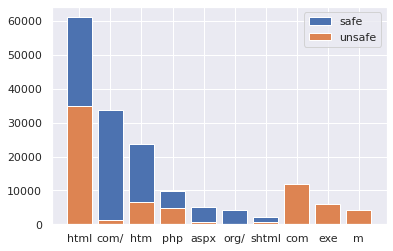

In [ ]:
import matplotlib.pyplot as plt

values_benign = df_by_safe_url_count.xs(1)
values_unsafe = df_by_safe_url_count.xs(0)
ax1 = plt.bar(values_benign.index,values_benign['url'])
ax1.set_label('safe')
ax2 = plt.bar(values_unsafe.index,values_unsafe['url'])
ax2.set_label('unsafe')
plt.legend()

In [ ]:
df_by_url_unsafe_count = df_top_ten_url_ext.loc[df.is_safe==0].groupby(['url_ext']).count()
df_by_url_unsafe_count = df_by_url_unsafe_count.sort_values(by='url',ascending=False)
df_by_url_unsafe_count

,url,type,url_ext_len,is_safe
url_ext,,,,
html,35013,35013,35013,35013
com,11950,11950,11950,11950
htm,6684,6684,6684,6684
exe,5877,5877,5877,5877
php,4713,4713,4713,4713
m,4100,4100,4100,4100
com/,1133,1133,1133,1133
aspx,590,590,590,590
shtml,559,559,559,559


<BarContainer object of 10 artists>

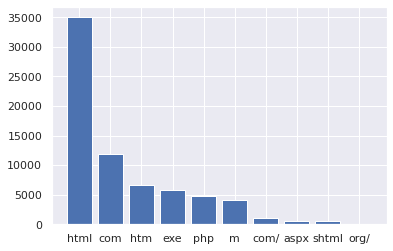

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df_by_url_unsafe_count.index,df_by_url_unsafe_count['url'])


In [ ]:
not_top_ten_url_ext = df.url_ext.value_counts()[10:].index
df_not_top_ten = df.loc[df.url_ext.isin(not_top_ten_url_ext)]
df_by_url_type_count = df_not_top_ten.groupby(['type']).count()
df_by_url_type_count = df_by_url_type_count.sort_values(by=['url_ext','url'],ascending=[False,False])
df_by_url_type_count

,url,url_ext,url_ext_len,is_safe
type,,,,
benign,287878,287878,287878,287878
defacement,74358,74358,74358,74358
phishing,56535,56535,56535,56535
malware,21561,21561,21561,21561


In [ ]:
df_top_ten_url_ext.index

Int64Index([     1,      2,      5,     10,     16,     19,     20,     23,
                31,     39,
            ...
            651164, 651166, 651167, 651170, 651173, 651176, 651179, 651182,
            651184, 651186],
           dtype='int64', length=210859)

In [ ]:
for url_ext in top_ten_url_ext:
  df[f'includes_{url_ext}'] = df.url_ext.apply(lambda x:1 if url_ext in x else 0)
df_by_type = df.groupby('type').sum()
df_by_type

,url_ext_len,is_safe,includes_html,includes_url,includes_type,includes_url_ext,includes_url_ext_len,includes_is_safe,includes_com/,includes_htm,includes_php,includes_com,includes_exe,includes_aspx,includes_org/,includes_m,includes_shtml
type,,,,,,,,,,,,,,,,,
benign,12201203,428103,69684,322,1072,0,0,0,200383,95385,26186,206203,252,9525,25118,340257,2277
defacement,4339376,0,26548,49,854,0,0,0,4591,27079,44340,49185,43,680,408,81530,0
malware,674349,0,585,17,57,0,0,0,2782,733,1911,3664,5942,124,34,12971,0
phishing,1491898,0,19008,52,77,0,0,0,18215,25474,5756,30734,63,1055,6265,64832,581


In [ ]:
df_for_vis_url = df_by_type.drop(labels=['url_ext_len','includes_url','includes_type',
                                         'includes_url_ext','includes_url_ext_len','includes_is_safe'],axis=1)

In [182]:
def check_url(url):
  for item in top_ten_url_ext:
    if item in url:
      return item



df['simple_ext'] = df.url.apply(check_url)

In [207]:
df_for_plot = df.groupby('simple_ext').is_safe.agg(['sum','count'])
df_for_plot['unsafe'] = df_for_plot['count'] - df_for_plot['sum']
df_for_plot

,sum,count,unsafe
simple_ext,,,
aspx,2094,2559,465
com,7436,26861,19425
com/,259149,318735,59586
exe,90,3785,3695
htm,10163,13181,3018
html,70818,118170,47352
m,23561,47889,24328
org/,26919,30984,4065
php,10857,48992,38135


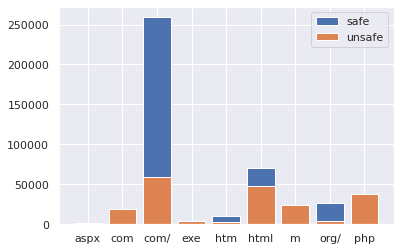

In [215]:
ax1 = plt.bar(df_for_plot.index,df_for_plot['sum'])
ax1.set_label('safe')
ax2 = plt.bar(df_for_plot.index,df_for_plot['unsafe'])
ax2.set_label('unsafe')
plt.legend()